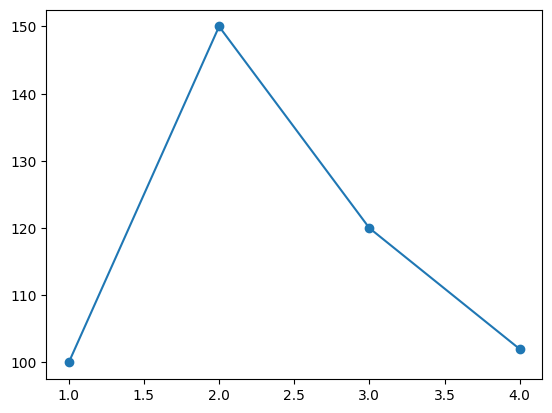

In [26]:
import matplotlib.pyplot as plt
x=[1,2,3,4]
y=[100,150,120,102]
plt.plot(x,y,marker='o')
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.shape

(8807, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df=df.dropna(subset=['director','cast','country','date_added','rating','duration'])

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [9]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


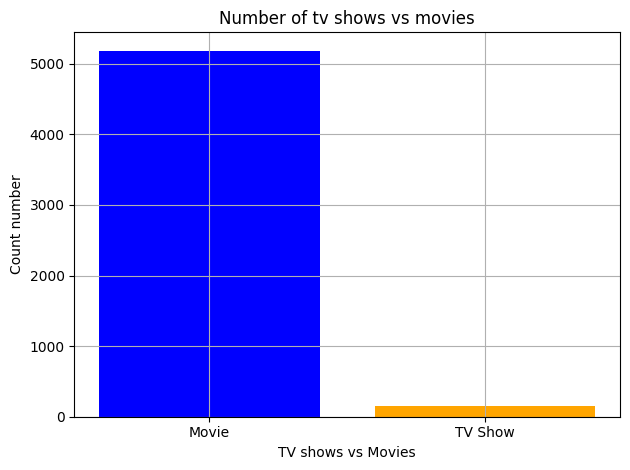

In [5]:
type_count=df['type'].value_counts()
plt.bar(type_count.index,type_count.values,color=['blue','orange'])
plt.title('Number of tv shows vs movies')
plt.xlabel('TV shows vs Movies')
plt.ylabel('Count number')
plt.grid(True)
plt.tight_layout()
plt.savefig('count_bar.png',dpi=300,bbox_inches='tight')
plt.show()

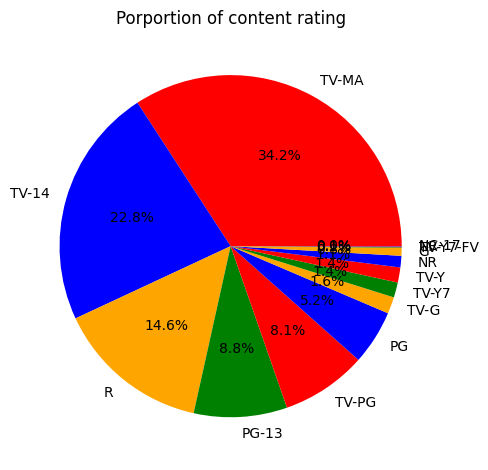

In [6]:
type_content=df['rating'].value_counts()
plt.pie(type_content.values,labels=type_content.index,colors=['red','blue','orange','green'],autopct='%1.1f%%')
plt.title('Porportion of content rating')
plt.tight_layout()
plt.savefig('content_pie.png',dpi=300,bbox_inches='tight')

plt.show()

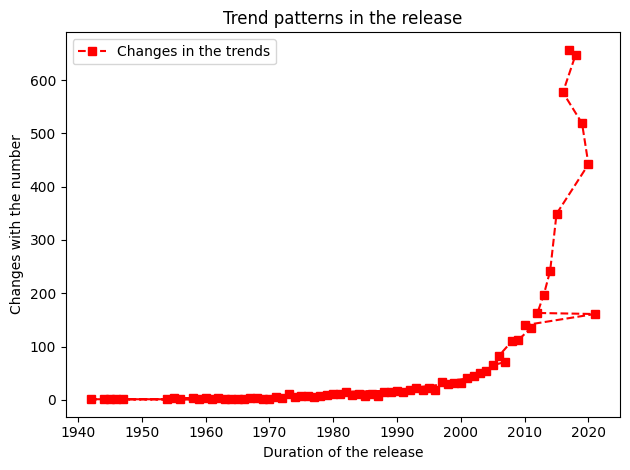

In [7]:
releases_changed=df['release_year'].value_counts()
plt.plot(releases_changed.index,releases_changed.values,linestyle='--',color='red',marker='s',label='Changes in the trends')
plt.xlabel('Duration of the release')
plt.ylabel('Changes with the number')
plt.title('Trend patterns in the release')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('trend_graph.png',dpi=300,bbox_inches='tight')
plt.show()

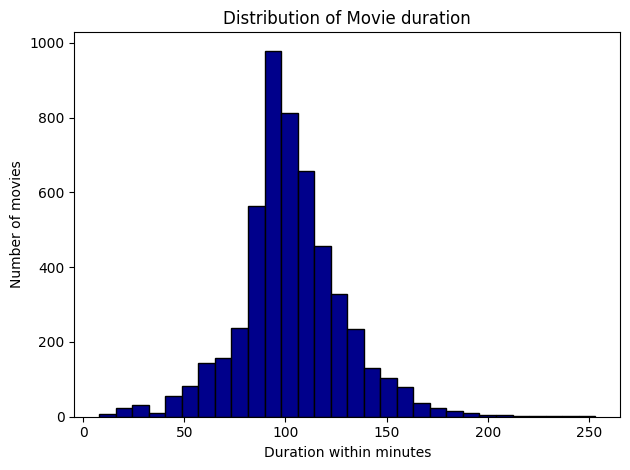

In [8]:
movie_distribution=df[df['type']=='Movie'].copy()
movie_distribution['duration_int']=movie_distribution['duration'].str.replace('min','').astype(int)
plt.hist(movie_distribution['duration_int'],bins=30,color='darkblue',edgecolor='black')
plt.title('Distribution of Movie duration')
plt.xlabel('Duration within minutes')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig('movies_hist.png',dpi=300,bbox_inches='tight')
plt.show()

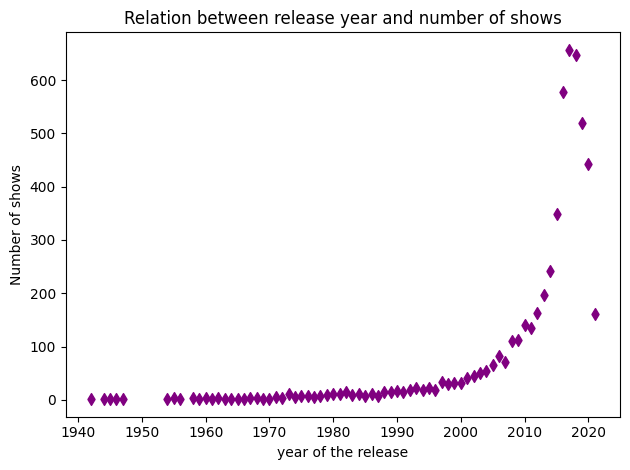

In [32]:
Release_year=df['release_year'].value_counts().sort_index()
plt.scatter(Release_year.index,Release_year.values,marker='d',color='purple')
plt.title('Relation between release year and number of shows')
plt.xlabel('year of the release')
plt.ylabel('Number of shows')
plt.tight_layout()
plt.show()


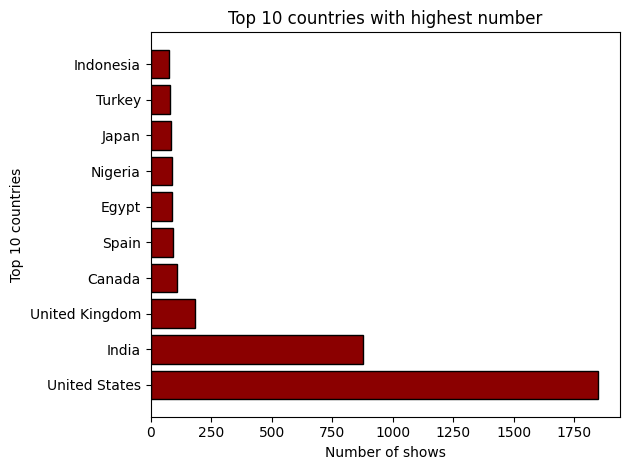

In [9]:
countries=df['country'].value_counts().head(10)
plt.barh(countries.index,countries.values,color='darkred',edgecolor='black',label='comparing shows from different country')
plt.title('Top 10 countries with highest number')
plt.xlabel('Number of shows')
plt.ylabel('Top 10 countries')
plt.tight_layout()
plt.savefig('count_country.png',dpi=300,bbox_inches='tight')
plt.show()

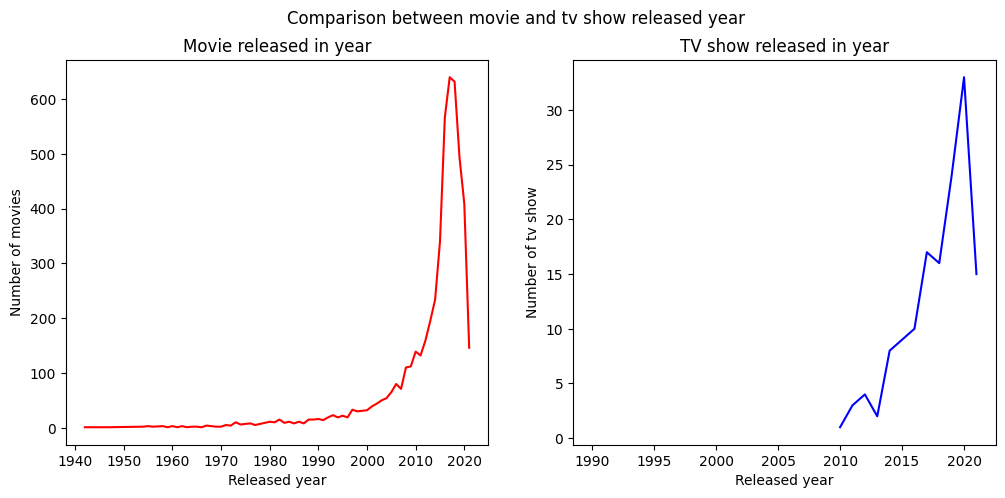

In [35]:
content_year=df.groupby(['release_year','type']).size().unstack()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.suptitle('Comparison between movie and tv show released year')
plt.title('Movie released in year')
plt.plot(content_year.index,content_year['Movie'],color='red')
plt.xlabel('Released year')
plt.ylabel('Number of movies')

plt.subplot(1,2,2)
plt.plot(content_year.index,content_year['TV Show'],color='blue')
plt.title('TV show released in year')
plt.xlabel('Released year')
plt.ylabel('Number of tv show')
plt.savefig('comparison.png',dpi=300,bbox_inches='tight')
plt.show()